# First trial at loading DIS and LPF files and dispaly them as a pyvista structured grid
O. Kaufmann, 2021.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import flopy
import pyvista as pv

In [3]:
simulation_name = 'test'

In [4]:
sim = flopy.mf6.MFSimulation(sim_name=simulation_name, exe_name="mf6", version="mf6", sim_ws=".")

In [5]:
m = flopy.modflow.Modflow()
dis =flopy.modflow.ModflowDis.load('211108_trial.dis',m)
lpf = flopy.modflow.ModflowLpf.load('211108_generic.lpf', m)

In [6]:
lpf.layavg

In [7]:
layers, nx, ny = lpf.ss.array.shape

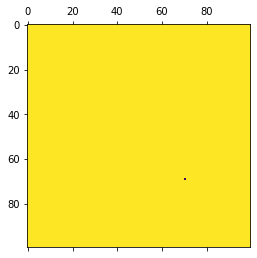

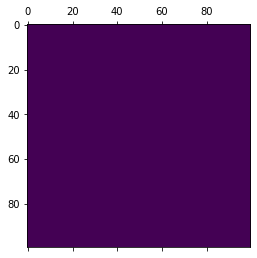

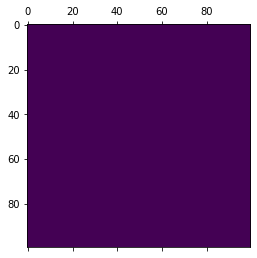

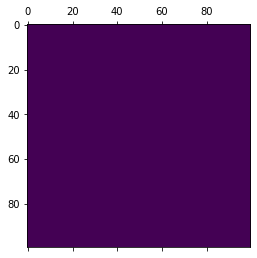

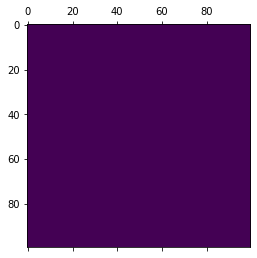

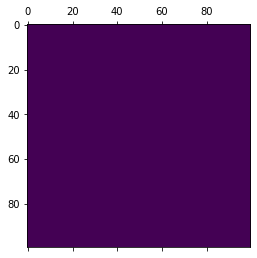

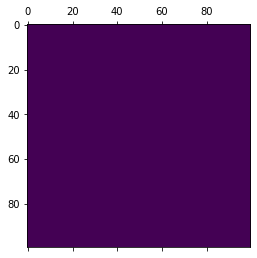

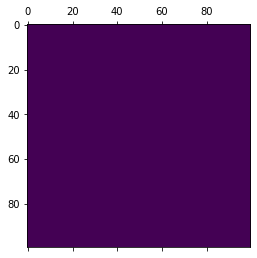

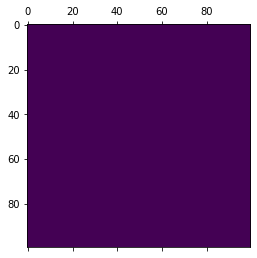

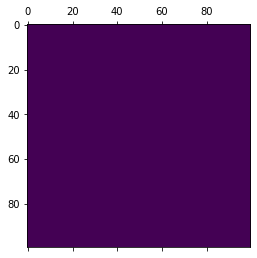

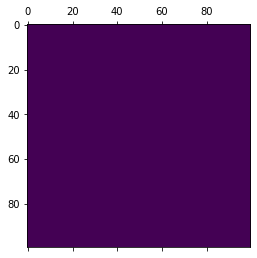

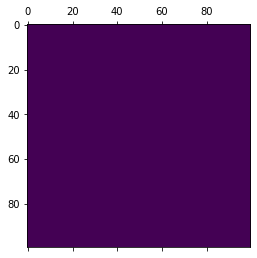

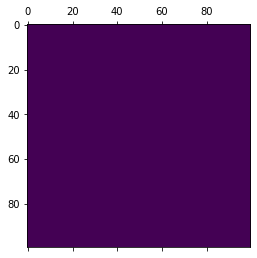

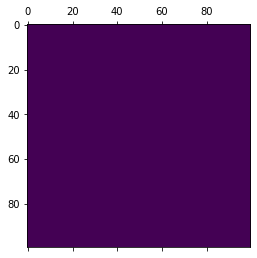

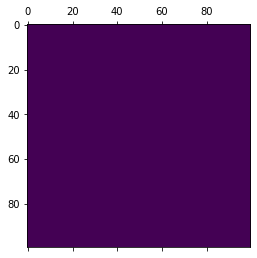

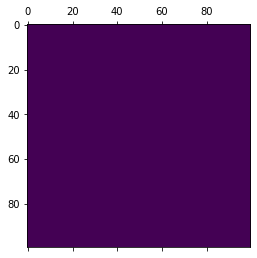

In [8]:
for i in range(layers):
    plt.matshow(dis.botm.array[i,:,:])

In [9]:
# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape + 1 because we want to inject our values on
#   the CELL data
grid.dimensions = np.array(lpf.hk.array.shape) + 1

# Edit the spatial reference
grid.origin = (100, 33, 55.6)  # The bottom left corner of the data set
grid.spacing = (1, 2, 2)  # These are the cell sizes along each axis

# Add the data values to the cell data
grid.cell_data['values'] = lpf.hk.array.flatten(order="F")  # Flatten the array!

# Now plot the grid!
pl = pv.Plotter()
pl.add_mesh(grid, show_edges=True)
pl.show(jupyter_backend='panel')

/home/su530201/.local/share/virtualenvs/gsdma_2021-CLBGPK-k/lib/python3.8/site-packages/panel/io/resources.py:43: DeprecationWarning: 'jinja2.Markup' is deprecated and will be removed in Jinja 3.1. Import 'markupsafe.Markup' instead.
  _env.filters['json'] = lambda obj: Markup(json.dumps(obj))
/home/su530201/.local/share/virtualenvs/gsdma_2021-CLBGPK-k/lib/python3.8/site-packages/panel/io/resources.py:43: DeprecationWarning: 'jinja2.Markup' is deprecated and will be removed in Jinja 3.1. Import 'markupsafe.Markup' instead.
  _env.filters['json'] = lambda obj: Markup(json.dumps(obj))
/home/su530201/.local/share/virtualenvs/gsdma_2021-CLBGPK-k/lib/python3.8/site-packages/panel/io/resources.py:43: DeprecationWarning: 'jinja2.Markup' is deprecated and will be removed in Jinja 3.1. Import 'markupsafe.Markup' instead.
  _env.filters['json'] = lambda obj: Markup(json.dumps(obj))
/home/su530201/.local/share/virtualenvs/gsdma_2021-CLBGPK-k/lib/python3.8/site-packages/panel/io/resources.py:43: D

In [10]:
grid.save('lpf.vtk')

## using an unstructured grid

In [11]:
x = np.cumsum(dis.delc.array)
y = np.cumsum(dis.delr.array)

In [12]:
x, y = np.meshgrid(x, y)

In [13]:
z_top = dis.top.array
z_bottom = dis.botm.array[0,:,:]

In [14]:
top = pv.StructuredGrid(x, y, z_top)
bottom = pv.StructuredGrid(x, y, z_bottom)

In [15]:
vol = pv.StructuredGrid()
vol.points = np.vstack((top.points.copy(), bottom.points.copy()))
vol.dimensions = [*top.dimensions[0:2], 2]
vol.plot(jupyter_backend='panel', show_edges=True, window_size=(800,600))

In [16]:
vol

StructuredGrid,Information
N Cells,9801
N Points,20000
X Bounds,"1.000e+01, 1.000e+03"
Y Bounds,"1.000e+01, 1.000e+03"
Z Bounds,"-2.500e+02, -2.000e+02"
Dimensions,"100, 100, 2"
N Arrays,0


In [17]:
bottom

StructuredGrid,Information
N Cells,9801
N Points,10000
X Bounds,"1.000e+01, 1.000e+03"
Y Bounds,"1.000e+01, 1.000e+03"
Z Bounds,"-2.500e+02, -2.400e+02"
Dimensions,"100, 100, 1"
N Arrays,0
